1. Load the diabetes dataset from sklearn.datasets and print the dataset information. Also perform PCA for n components = 3 and plot the data.

In [1]:
from sklearn.datasets import load_diabetes

# load the diabetes dataset
diabetes = load_diabetes()

# print dataset information
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [2]:
# print the first 5 rows of the dataset
diabetes.data[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [3]:
# perform PCA for n_components = 3
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # create a PCA object
pca.fit(diabetes.data) # fit the data to the PCA object
pca_data = pca.transform(diabetes.data) # transform the data using the PCA object

# check if the data is transformed correctly
print(diabetes.data.shape) # original data shape
print(pca_data.shape) # transformed data shape

(442, 10)
(442, 3)


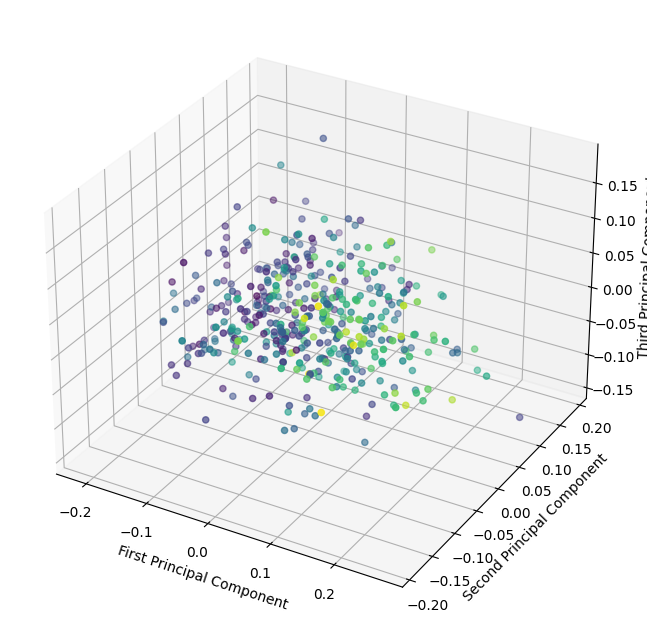

In [4]:
# plot the data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create a 3D scatter plot of the transformed data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=diabetes.target)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()

There is no clear pattern in the data based on the target variable and the colour of the points which hints that the 3 components are not enough to explain the variance in the data. Further analysis is required to determine a solution to the problem.

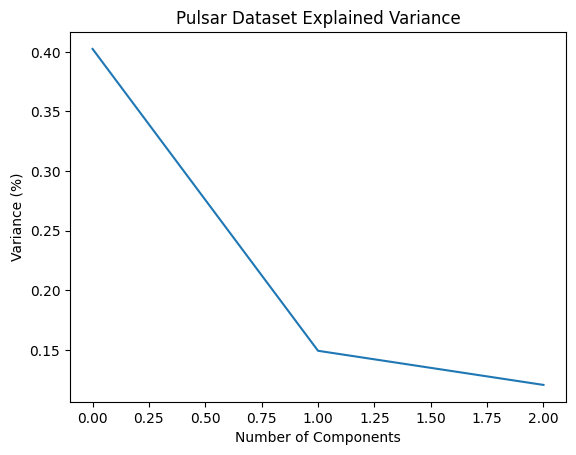

In [5]:
# plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

Based on the graph, we can see how rapidly the variance decreases as we increase the number of components.

2. What is the variance % covered by the 1st, 2nd and 3rd components? Also, how is this percentage of variance computed?

In [6]:
variance_covered = sum(pca.explained_variance_ratio_)
print(f'The variance covered by the first 3 components is {variance_covered * 100:.2f}%')

The variance covered by the first 3 components is 67.22%


In [7]:
# print the variance explained by each component
for i in range(len(pca.explained_variance_ratio_)):
    print(f'Component {i+1}: {pca.explained_variance_ratio_[i] * 100:.2f}%')

Component 1: 40.24%
Component 2: 14.92%
Component 3: 12.06%


The percentage of variance is computed using eigenvalues of the covariance matrix of the original data. Each principal component is a linear combination of the original features that captures the maximum amount of variance in the data, while also being orthogonal to the other components.

3. Is there any correlation between the components? If yes, then how is it computed? If no, then why? Also, plot the correlation matrix.

In [8]:
import pandas as pd

# get the principal components for the dataset
components = pca.components_

# create a dataframe of the principal components
dataframe = pd.DataFrame(components.T, columns=['PC1', 'PC2', 'PC3'], index=diabetes.feature_names)

# plot the correlation matrix
correlation_matrix = dataframe.corr()

# print
print(correlation_matrix)

          PC1       PC2       PC3
PC1  1.000000 -0.308266 -0.477867
PC2 -0.308266  1.000000 -0.084547
PC3 -0.477867 -0.084547  1.000000


Analysis:
PC1 and PC2 have a correlation coefficient of -0.308, which indicates a weak negative correlation.
PC1 and PC3 have a correlation coefficient of -0.477, which indicates a moderate negative correlation.
PC2 and PC3 have a correlation coefficient of -0.085, which indicates a very weak negative correlation.

EXTRA: I am only a SIT307 student but i wanted to try out questions 4 and 5 to improve my understanding of PCA and t-SNE.

In [9]:
# load the diabetes dataset again
X, y = load_diabetes(return_X_y=True)

# apply t-SNE with default parameters
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)

C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


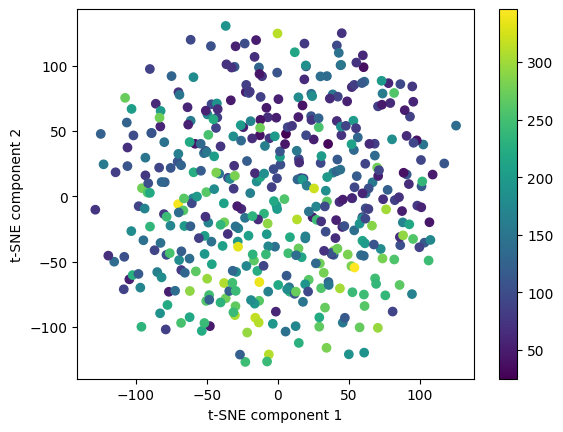

In [10]:
# plot the data
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.colorbar()
plt.show()

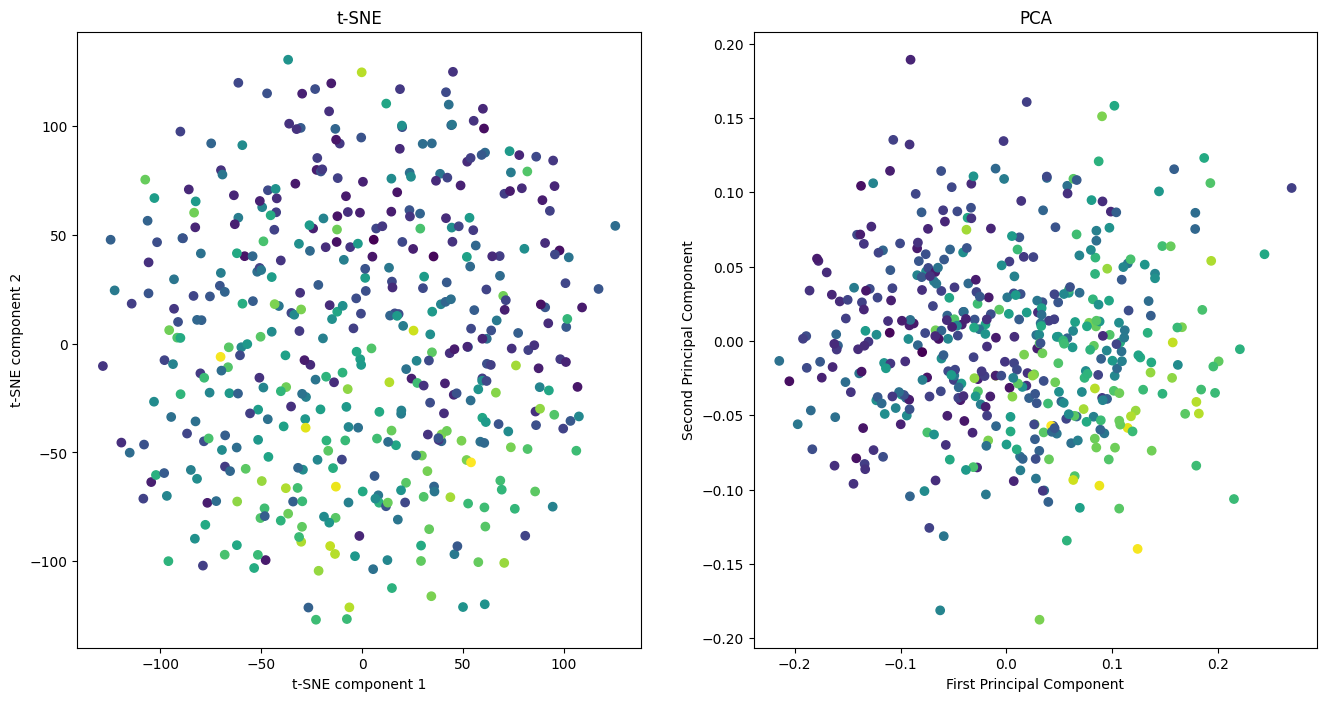

In [11]:
# compare the t-SNE plot with the PCA plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8)) # create a figure with 2 subplots side by side

# plot the t-SNE data
ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
ax1.set_xlabel('t-SNE component 1')
ax1.set_ylabel('t-SNE component 2')
ax1.set_title('t-SNE')

# plot the PCA data
ax2.scatter(pca_data[:, 0], pca_data[:, 1], c=y, cmap='viridis')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.set_title('PCA')

plt.show()

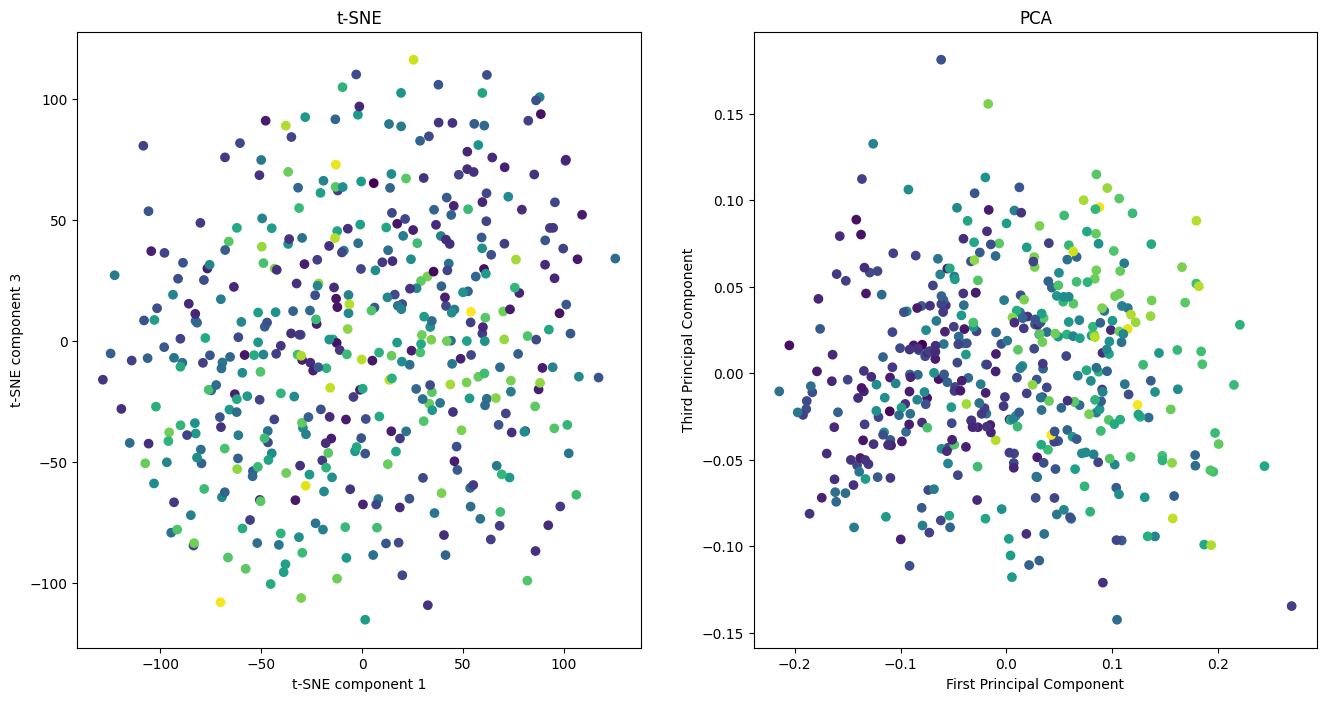

In [13]:
# plot the third component of the t-SNE data and the PCA data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8)) # create a figure with 2 subplots side by side

# plot the t-SNE data
ax1.scatter(X_tsne[:, 0], X_tsne[:, 2], c=y, cmap='viridis')
ax1.set_xlabel('t-SNE component 1')
ax1.set_ylabel('t-SNE component 3')
ax1.set_title('t-SNE')

# plot the PCA data
ax2.scatter(pca_data[:, 0], pca_data[:, 2], c=y, cmap='viridis')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Third Principal Component')
ax2.set_title('PCA')

plt.show()